<b><font style="centred" color="DarkRed"><h1>   La description des données</h1></font></b>


   <font color="FireBrick"><h4>Contexte : Mesures de la consommation d'énergie électrique dans un ménage avec un taux d'échantillonnage d'une minute sur une période de près de 4 ans. Différentes grandeurs électriques et certaines valeurs de sous-comptage sont disponibles.</h4></font>        

<font color="RoyalBlue"><b><i>Caractéristiques de l'ensemble de données :</i></b>
Multivarié, série chronologique</font>


<font color="RoyalBlue"><b><i>Tâches associées :</i></b>
Régression, regroupement
</font>

<font color="RoyalBlue"><b><i>Informations sur l'ensemble de données :</i></b>
Cette archive contient 2075259 mesures recueillies entre décembre 2006 et novembre 2010 (47 mois).

</font>

<font color="RoyalBlue"><b><i>Remarques :</i></b><br>

1.	(globalactivepower * 1000/60 - submetering1 - submetering2 - submetering3) représente l'énergie active consommée chaque minute (en wattheure) dans le ménage par un équipement électrique non mesuré aux sous-comptages 1, 2 et 3.
2.	Le jeu de données contient des valeurs manquantes dans les mesures (près de 1,25% des lignes). Tous les horodatages du calendrier sont présents dans le jeu de données mais pour certains horodatages, les valeurs de mesure sont manquantes : une valeur manquante est représentée par l'absence de valeur entre deux séparateurs d'attributs point-virgule consécutifs. Par exemple, l'ensemble de données montre des valeurs manquantes le 28 avril 2007.



</font>

<font color="RoyalBlue"><b><i>Informations d'attribut:</i></b>
1.	date: Date au format jj / mm / aaaa
2.	heure: heure au format hh: mm: ss
3.	puissance active globale: puissance active moyenne par minute du ménage (en kilowatt)
4.	puissance réactive globale: puissance réactive moyenne par minute des ménages (en kilowatt)
5.	tension: tension moyenne minute (en volt)
6.	global_intensity: intensité de courant moyenne globale par minute des ménages (en ampères)
7.	sous-comptage 1: sous-comptage d'énergie n ° 1 (en watt-heure d'énergie active). Il correspond à la cuisine, contenant principalement un lave-vaisselle, un four et un micro-ondes (les plaques ne sont pas électriques mais au gaz).
8.	sous-comptage 2: sous-comptage d'énergie n ° 2 (en watt-heure d'énergie active). Il correspond à la buanderie, contenant un lave-linge, un sèche-linge, un réfrigérateur et une lumière.
9.	sous-comptage3: sous-comptage d'énergie n ° 3 (en watt-heure d'énergie active). Il correspond à un chauffe-eau électrique et à un climatiseur.

</font>

<font color="PaleVioletRed" ><b><h2>Tutorial Analyse Statistique: Consommation Electrique avec Pandas-partie 1</h2></b></font>

<font color="Night">*Nous allons dans ce Notebook procéder à l'analyse d'un jeu de données de plus de 2.5 Millions de lignes représentant les consommations éléctriques selon différents paramètres. Les données sont fournies minute par minute.
Les détails du jeu de données sont ici : https://www.kaggle.com/uciml/electric-power-consumption-data-set Le format en entrée est un fichier texte (format csv, séparateur ;).
Dans un premier temps nous allons importer les données via Panda et resampler pour avoir un suivi par jour. Ensuite nous allons analyser les différentes features et essayer d'extraire des corrélations de ces données.
Nous ne traiterons pas dans cette partie de l'analyse par un réseau de Neurones pour les prédictions.*
    
</font>

<font color="Navy"><b>Import des librairies nécessaires :</b></font>

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import nan
from numpy import isnan
from scipy.stats import norm 
from matplotlib import axes
from matplotlib import pyplot
from matplotlib import pyplot as plt
from matplotlib import style
style.use("ggplot")
import scipy.stats as sc
import datetime
%matplotlib inline

# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

<font color="Navy"><b>Traitement des données:</b></font>

<h3><b>Lecture du fichier de données :</b></h3>

In [2]:
dataset = pd.read_csv('C:/Users/Hamza/Downloads/Data_Science/household_power_consumption.txt',
                   sep=';',                            # separateur = ;
                   header=0,                           # ligne des header = 1ère ligne
                   low_memory=False,                   # parsing complet
                   infer_datetime_format=True,         # parsing des dates
                   parse_dates={'datetime':[0,1]},     # les dates se parsent via les 2 premières colonnes
                   index_col=['datetime'])    

<h3><b>Visualisation de quelques éléments du dataset :</b></h3>

In [3]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


 Principales informations sur le Dataset:
 Nous trouvons ici principalement le nombre de lignes et les dates des données
 Nous trouvons également le type des colonnes.



In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


<h3><b>Suppression des données manquantes :</b></h3>

Comme tout jeu de données certaines données seront manquantes. Nous allons le vérifier et nous prenons le choix dans cet exemple de supprimer les lignes avec des données non numériques .


Comptage des valeurs manquantes dans le dataset :

In [7]:
dataset[dataset[dataset.columns]=="?"] = np.nan
dataset.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

On apercoit que la colonne contenant tous les manquants est 'Sub_metering_3'. Nous allons donc faire une recherche dans le dataframe sur cette colonne.

In [6]:
# Visualisation de quelques manquants sur la colonne en question

dataset.loc[dataset["Sub_metering_3"].isnull()].head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,?,?,?,?,?,?,NaN
2006-12-21 11:24:00,?,?,?,?,?,?,NaN
2006-12-30 10:08:00,?,?,?,?,?,?,NaN
2006-12-30 10:09:00,?,?,?,?,?,?,NaN
2007-01-14 18:36:00,?,?,?,?,?,?,NaN


In [8]:
# Suppression des valeurs non numériques et conversion des colonnes en float
dataset = dataset.fillna(dataset.mean())
dataset = dataset.astype('float32')

<h3><b>Rééchantillonnage des Données :</b></h3>

Les données du Dataset sont fournies minute par minute. Nous allons les resampler par jour et semaine pour les visualiser. Panda dispose d'une méthode trés pratique pour faire cette opération.

In [9]:
# Groupes pour le resampling
daily_groups = dataset.resample('D')
weekly_groups = dataset.resample('W')
monthly_groups = dataset.resample('M')

In [10]:
# Jeux de données resamplés
daily_data = daily_groups.mean()
weekly_data = weekly_groups.mean()
monthly_data = monthly_groups.mean()

In [11]:
# Visualisation des données / jour
daily_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,3.053475,0.088187,236.243759,13.082829,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087021,9.999028,1.411806,2.907639,9.264584
2006-12-18,1.530435,0.112356,241.231689,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308060,6.467361,0.000000,1.838889,9.765972


=> On constate que les données sont désormais groupées et sommées par jour dans le dataframe daily_data.

<b><h3>Analyse Graphique du jeu de données :</h3></b>

Nous allons maintenant procéder à l'analyse des données grâce aux librairies graphiques de python. Principalement matplotlib ici et seaborn qui propose aussi quelques visualisations de qualité.

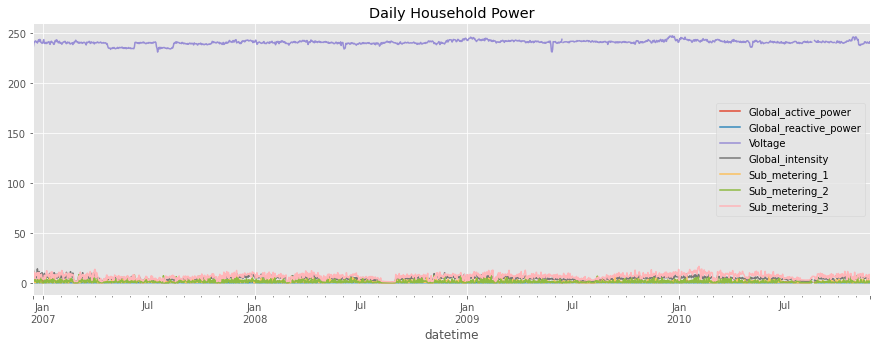

In [12]:
# Plot de toutes les features
ax = daily_data.plot(title='Daily Household Power', figsize=(15,5))


=> Nouv observons que le Voltage est une feature qui semble être constante hormis les trous, ce sont peut être des pannes ou des maintenance.
Observons de plus près sur la dernière année, pour celà nous allons créer un masque (boolean) pour filtrer les données, puis utiliser la fonction .loc() de Panda pour les affichier.


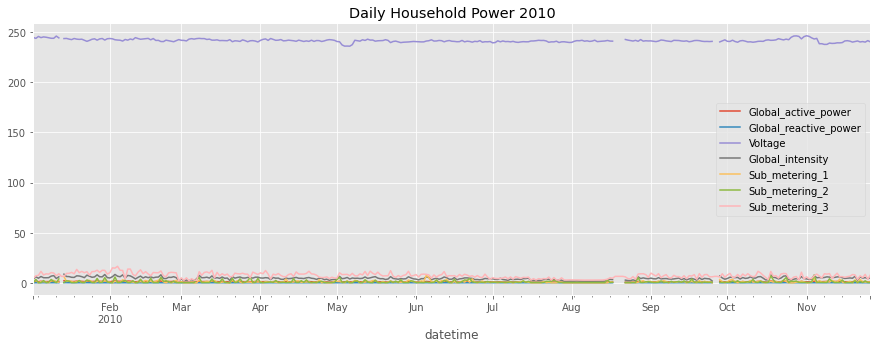

In [13]:
# Filtre sur les dates des données de la dernière année
mask = (daily_data.index > '2010-01-01') & (daily_data.index < '2011-01-01')
ax = daily_data.loc[mask].plot(title='Daily Household Power 2010', figsize=(15,5))


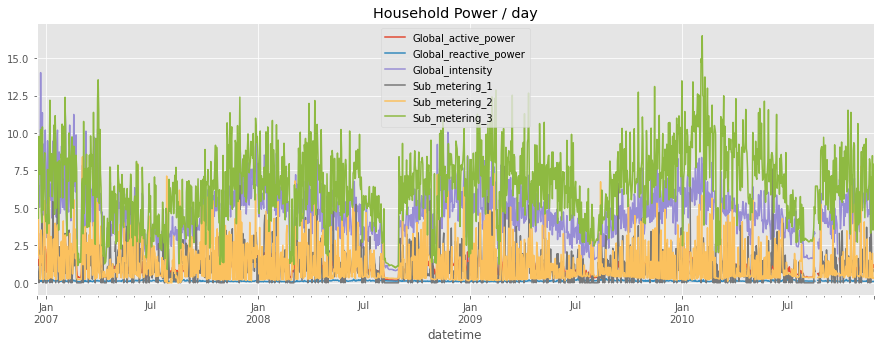

In [14]:
# Suppression de la feature voltage pour observer les autres features
ddata = daily_data.drop(columns=['Voltage'])
ax= ddata.plot(title='Household Power / day', figsize=(15,5))


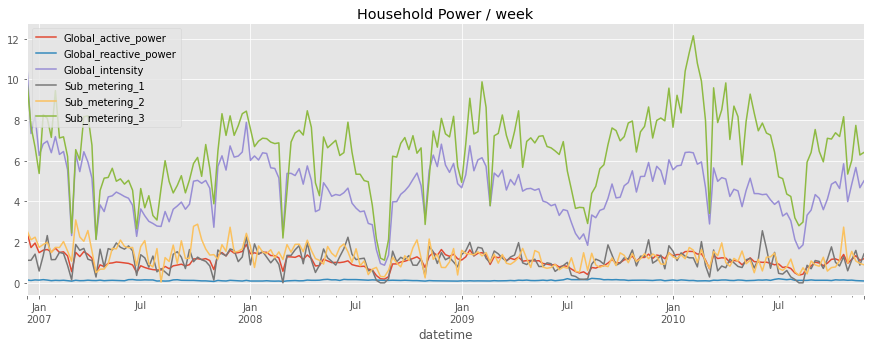

In [15]:
# Suppression de la feature voltage pour observer les autres features weekly
wkdata = weekly_data.drop(columns=['Voltage'])
ax= wkdata.plot(title='Household Power / week', figsize=(15,5))


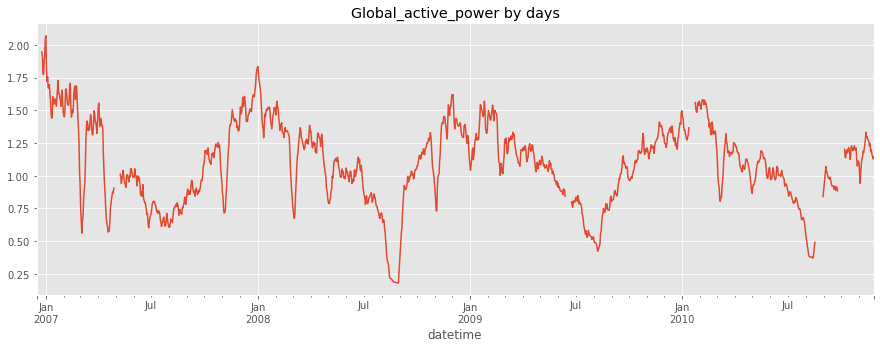

In [16]:
# Plotting de la puissance totale par jour
ax = daily_data.Global_active_power.rolling(10).mean().plot(title='Global_active_power by days', figsize=(15,5))


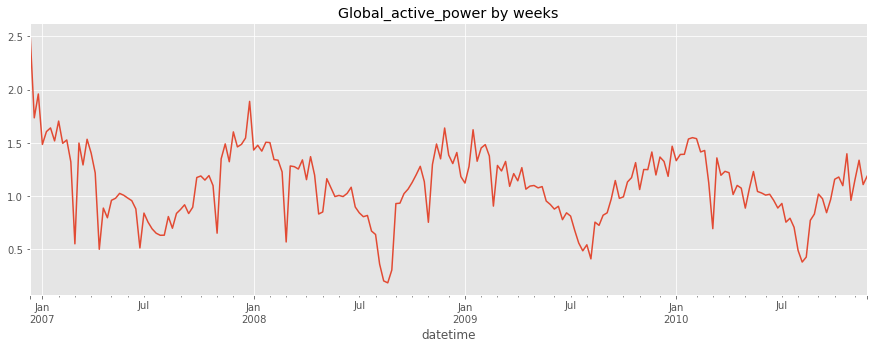

In [17]:
# Plotting de la puissance totale par semaine
ax= weekly_data.Global_active_power.plot(title='Global_active_power by weeks', figsize=(15,5))


C:\Users\Hamza\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


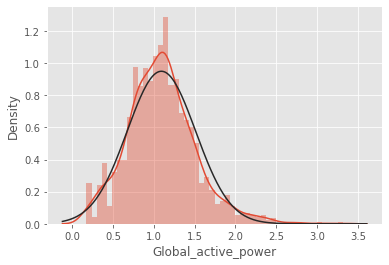

In [18]:
# Observation de la distribution de la puissance par rapport à une distribution Gaussienne
ax = sns.distplot(daily_data['Global_active_power'], fit=norm, bins=50, kde=True);


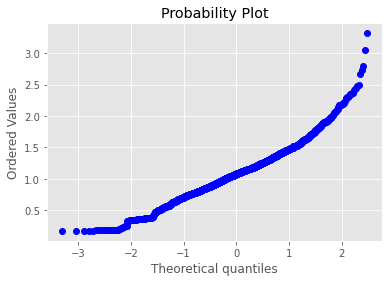

In [19]:
# Analyse de la distribution Gaussienne
ax = sc.probplot(daily_data['Global_active_power'], plot=pyplot)


<b><h3>Analyse des Correlations entre les Features :</h3></b>

Nous allons maintenant procéder à l'analyse des corrélations entres les différentes features du dataset. La corrélation entre des features signifie qu'il existe une fonction mathématique permettant de préduire l'une à partir de l'autre.

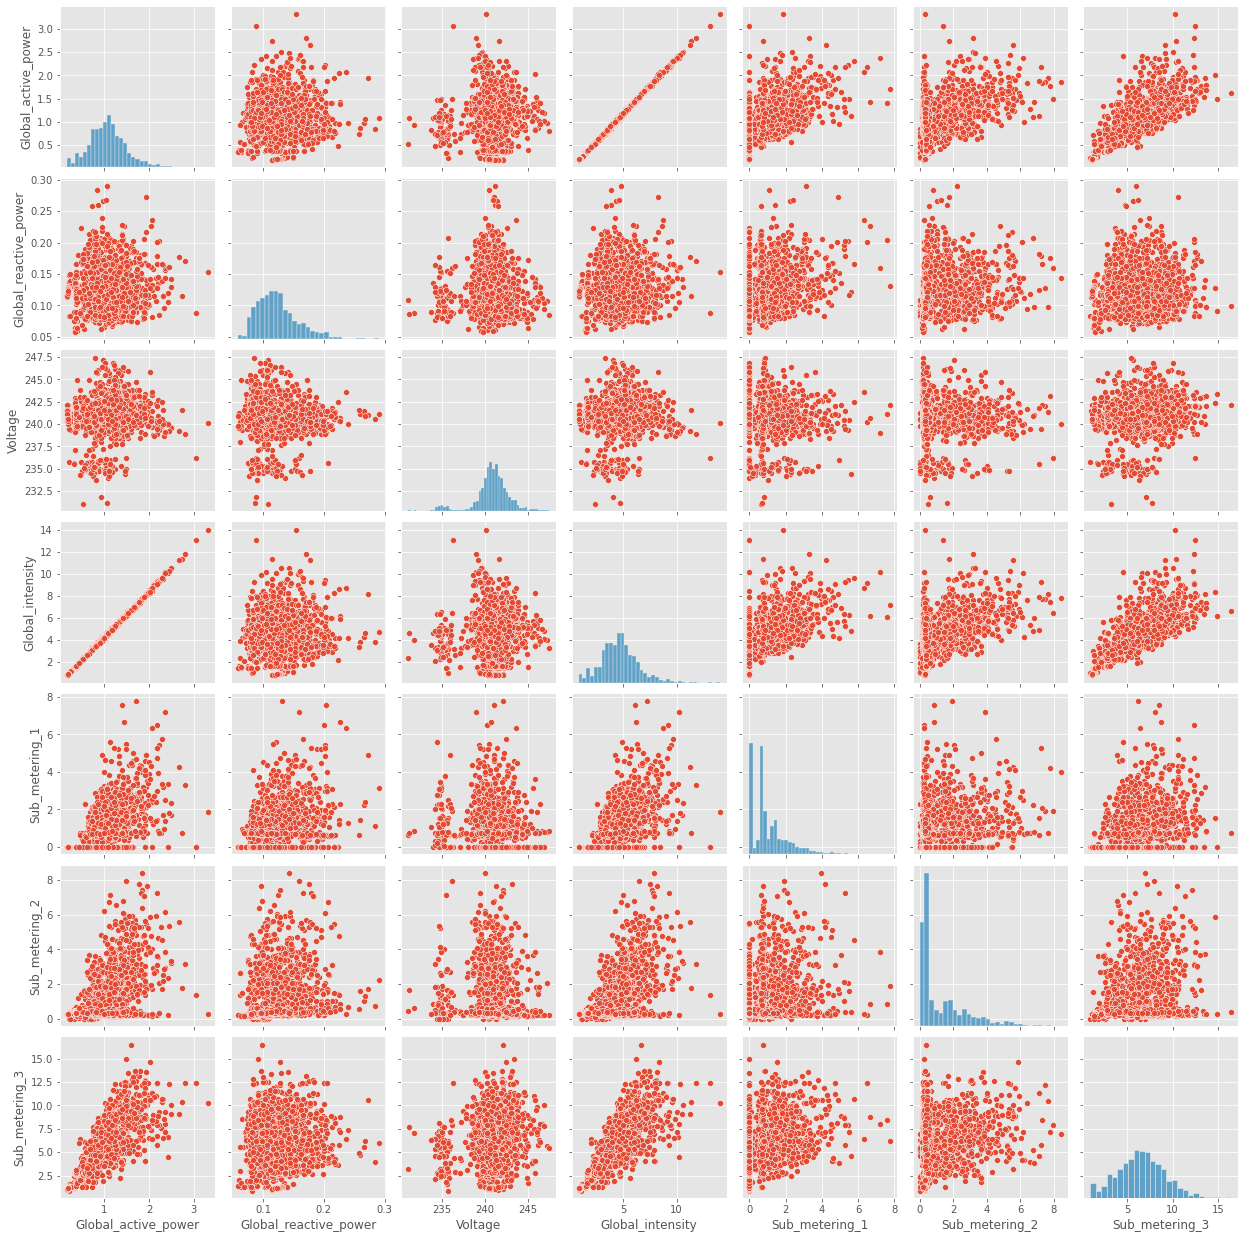

In [20]:
# Plotting de l'ensemble des features du jeu de données deux par deux
ax = sns.pairplot(daily_data, height = 2.5)


=>On observe dans les graphiques ci-dessus que certaines features semblent corrélées.
Nous allons analyser de plus près ce point dans ce paragraphe:


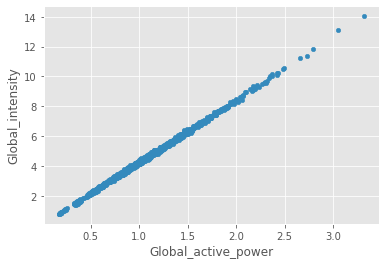

In [21]:
# Plotting de deux variables qui semblent corrélées:
ax = daily_data.plot.scatter(x='Global_active_power', y='Global_intensity')


C:\Users\Hamza\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


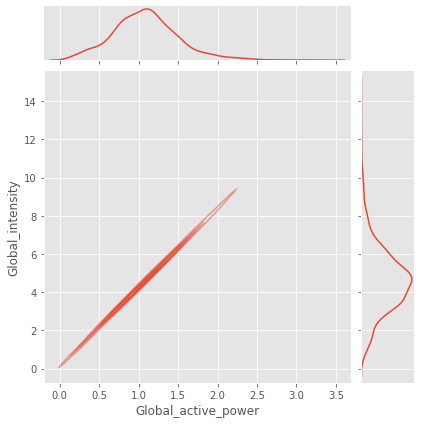

In [22]:
# Analyse plus détaillée entre les deux features précédentes
ax=sns.jointplot(daily_data['Global_active_power'], daily_data['Global_intensity'], kind='kde', 
                   joint_kws={'alpha':0.5}, 
                   height=6)


C:\Users\Hamza\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


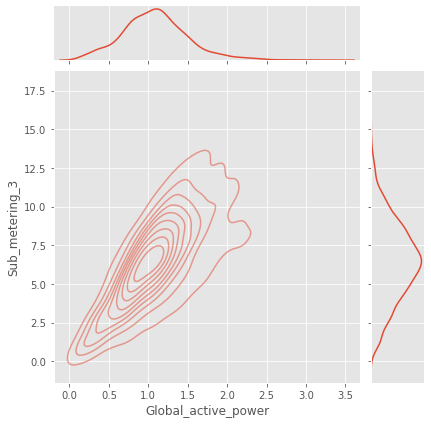

In [23]:
# Analyse entre deux autres features
ax=sns.jointplot(daily_data['Global_active_power'], daily_data['Sub_metering_3'],
                   kind='kde', 
                   joint_kws={'alpha':0.5}, 
                   height=6)

<font color=  #ba4a00 ><h4><b><i>Heatmap de Corrélation</i></b><br></h4></font>
Après avoir observé des corrélations possibles entre certaines features nous allons maintenant observer factuellement l'indice de corrélation. Ceci peut se faire grâce à une Heatmap


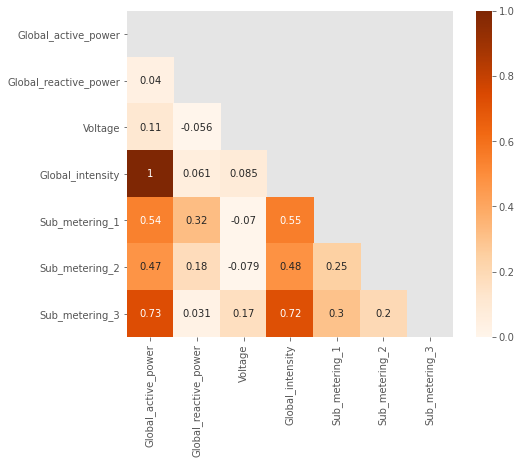

In [24]:
# Heatmap de corrélation de type pearson
# Les features corrélées auront des valeurs proche de 1
plt.figure(figsize = (8,6))
pearson = daily_data.corr(method='pearson')
mask = np.zeros_like(pearson)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(pearson, vmax=1, vmin=0, square=True, cbar=True, annot=True, cmap="Oranges", mask=mask);

=>Nous voyons que certaines des features ont une valeur proche de 

Ci-dessous à titre illustratif un premier exemple de visualisation en 3D:

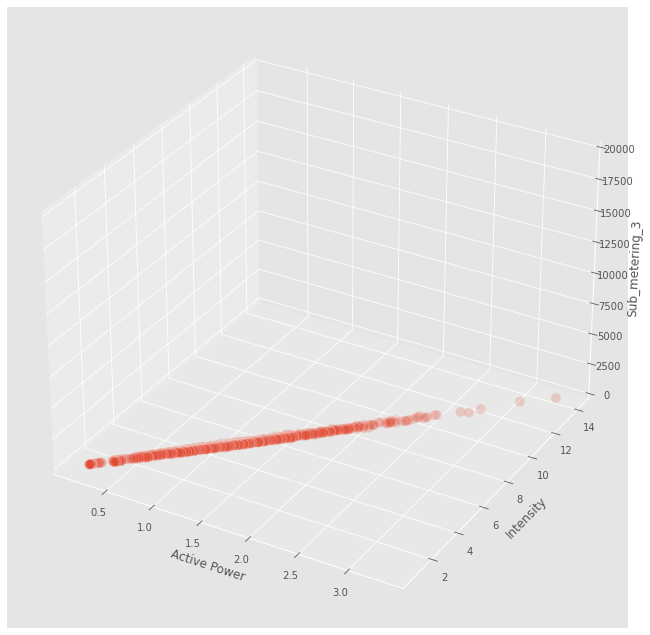

In [25]:
# 3D plotting
from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure(figsize=(80, 80))
ax = fig.add_subplot(666, projection='3d')
xs = daily_data['Global_active_power']
ys = daily_data['Global_intensity']
zs = daily_data['Sub_metering_3']
ax.scatter(xs, ys, zs, s=100, alpha=0.2, edgecolors='w')
ax.set_xlabel('Active Power')
ax.set_ylabel('Intensity')
ax.set_zlabel('Sub_metering_3')
ax.set(zlim=(0, 20000))
pyplot.show()


<h3><b> Analyse en composantes principales : </b></h3>

<font color =  #ba4a00 ><h4><b><i>Mise à l'échelle : Standardisation et Normalisation</i></b></h4></font>

In [26]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(daily_data)
daily_data_scaled = std_scale.transform(daily_data)
std_scale = preprocessing.StandardScaler().fit(weekly_data)
weekly_data_scaled = std_scale.transform(weekly_data)
std_scale = preprocessing.StandardScaler().fit(monthly_data)
monthly_data_scaled = std_scale.transform(monthly_data)

<b>Essayant avec 2 composants principals :</b>

In [27]:
from sklearn import decomposition
# Set a component analysis (PCA) with 2 components
pca = decomposition.PCA(n_components = 2)
# calculate the principal component analysis with weekly_data_scaled(the data that we have)
pca.fit(weekly_data_scaled)

PCA(n_components=2)

In [28]:
print("L'inertie expliquée par chaque axe factoriel :",pca.explained_variance_ratio_)
print("La somme de l'inertie expliquée(par le sous espace) :",pca.explained_variance_ratio_.cumsum())

L'inertie expliquée par chaque axe factoriel : [0.52672887 0.16580208]
La somme de l'inertie expliquée(par le sous espace) : [0.52672887 0.69253093]


<font color = "purple" >=> La totalitée de l'information expliquées est insufisante avec 2 composants donc on essayera avec 5 composants</font>

In [29]:
#On essaye avec 5 composants
pca = decomposition.PCA(n_components = 5)
pca.fit(weekly_data_scaled)
print("L'inertie expliquée par chaque axe factoriel :",pca.explained_variance_ratio_)
print("La somme de l'inertie expliquée(par le sous espace) :",pca.explained_variance_ratio_.cumsum())

L'inertie expliquée par chaque axe factoriel : [0.52672887 0.16580208 0.14231418 0.08528998 0.0537926 ]
La somme de l'inertie expliquée(par le sous espace) : [0.52672887 0.69253093 0.8348451  0.9201351  0.9739277 ]


In [30]:
pcs = pca.components_
print("vecteur directeur des axes factorielles" )
pcs

vecteur directeur des axes factorielles


array([[ 0.5067821 , -0.13328893,  0.1482594 ,  0.5058099 ,  0.3758021 ,
         0.33330664,  0.44188288],
       [-0.03969432,  0.13799961, -0.8014761 , -0.0115993 ,  0.30952305,
         0.43712053, -0.22361346],
       [-0.0449505 ,  0.9433512 ,  0.19914977, -0.03349832,  0.2184616 ,
        -0.02164999,  0.13816814],
       [-0.02139822, -0.10460782, -0.32028028, -0.01802862,  0.48461485,
        -0.7567056 ,  0.27971324],
       [ 0.1962809 ,  0.20299904, -0.43922442,  0.2095926 , -0.6910212 ,
        -0.13512617,  0.43318418]], dtype=float32)

<font color =  #ba4a00 ><h4><b><i>Représentation du cercle de corrélation</i></b></h4></font>

TypeError: set_aspect() missing 1 required positional argument: 'self'

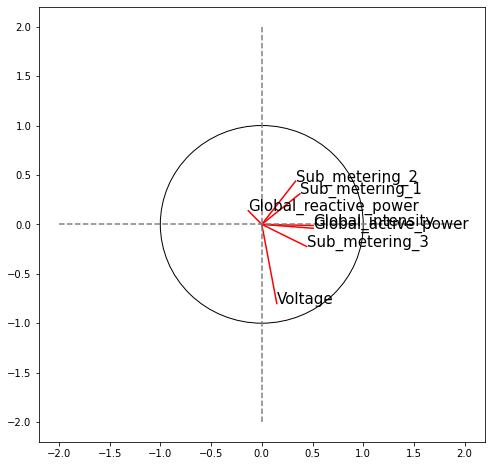

In [31]:
plt.figure(figsize=(8,8))
style.use("default")
#zip give a tuple from each vector item in order and enumerate give it a number
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
 # Afficher un segment de l'origine au point (x, y)
 plt.plot([0, x], [0, y], color='red')
 # Afficher le nom (data.columns[i]) de la performance au point (x,y)
 plt.text(x, y, dataset.columns[i], fontsize='15')
    
# Afficher une ligne horizontale y=0
plt.plot([-2, 2], [0, 0], color='grey', ls='--')
# Afficher une ligne verticale x=0
plt.plot([0, 0], [-2, 2], color='grey', ls='--')

draw_circle = plt.Circle((0,0),1,fill=False)
plt.gcf().gca().add_artist(draw_circle)

axes.Axes.set_aspect(aspect=1)
plt.xlim([-2, 2])
plt.ylim([-2, 2])

<b><h3>Analyse de consommation de l'energie :</h3></b>

In [32]:
#on ajoute une colonne qui représente l'energie active consommée chaque minute
dataset["Energy_Consumption"] = dataset["Global_active_power"]*1000/60-dataset["Sub_metering_1"]-dataset["Sub_metering_2"]-dataset["Sub_metering_3"]

In [33]:
#regrouper les données pour savoir la consommation par jour mois et année
daily_groups = dataset.resample('D')
weekly_groups = dataset.resample('W')
monthly_groups = dataset.resample('M')
daily_data = daily_groups.mean()
weekly_data = weekly_groups.mean()
monthly_data = monthly_groups.mean()

<font color =  #ba4a00 ><h4><b><i>Analyse graphique du donnée ajoutée </i></b></h4></font>

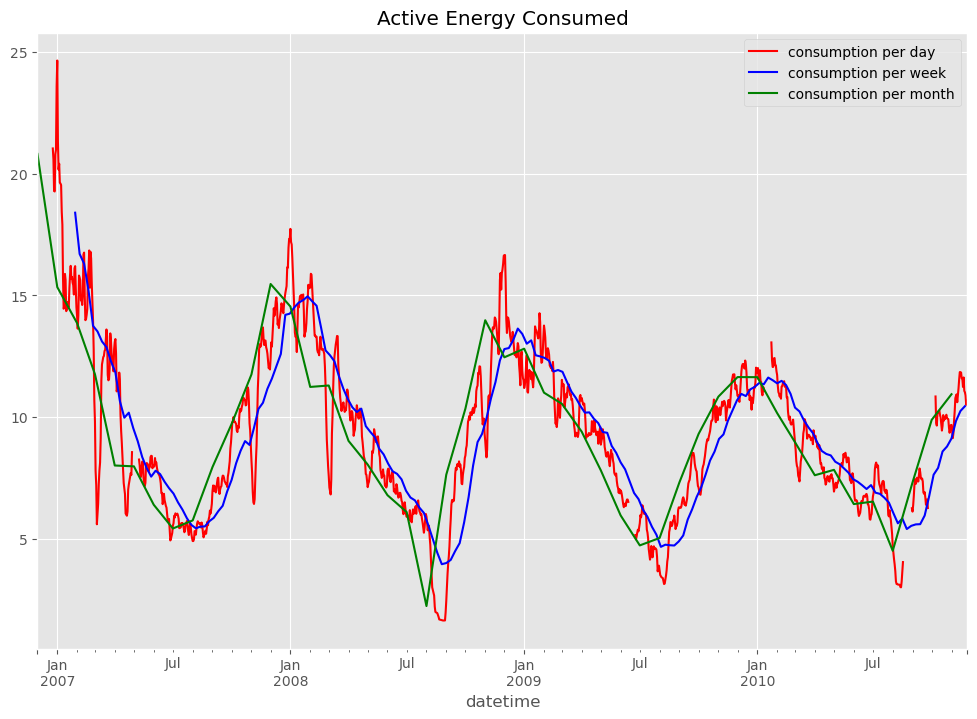

In [34]:
plt.figure(figsize=(12,8))
style.use("ggplot")
daily_data["Energy_Consumption"].rolling(10).mean().plot(color = "red",label="consumption per day")
weekly_data["Energy_Consumption"].rolling(8).mean().plot(color = "blue",label="consumption per week")
monthly_data["Energy_Consumption"].rolling(1).mean().plot(color = "green",label="consumption per month")
plt.title("Active Energy Consumed")
plt.legend()

<font color=  #ba4a00 ><h4><b><i> Identification des périodes de grande consommation </i></b></h4></font>

In [35]:
daily_data_sorted = daily_data["Energy_Consumption"].sort_values(ascending=False)
print("Les dates de plus grandes consommation par jour :\n\n ",daily_data_sorted.iloc[:10],"\n" )
weekly_data_sorted = weekly_data["Energy_Consumption"].sort_values(ascending=False)
print("Les dates de plus grandes consommation par semaine :\n\n",weekly_data_sorted.iloc[:10],"\n")
monthly_data_sorted = monthly_data["Energy_Consumption"].sort_values(ascending=False)
print("Les dates de plus grandes consommation par mois :\n\n",monthly_data_sorted.iloc[:10],"\n")

Les dates de plus grandes consommation par jour :

  datetime
2006-12-23    42.872524
2006-12-16    37.073063
2006-12-31    35.685833
2006-12-26    32.618404
2007-03-11    27.972639
2007-02-03    27.784050
2007-01-01    27.489399
2007-02-11    27.230185
2008-11-24    26.804838
2007-02-22    26.682175
Name: Energy_Consumption, dtype: float32 

Les dates de plus grandes consommation par semaine :

 datetime
2006-12-17    28.119608
2006-12-31    22.309978
2007-12-30    18.297153
2006-12-24    17.989429
2007-01-07    17.033941
2008-11-30    16.972553
2007-02-04    16.054483
2007-01-28    15.520356
2007-01-14    15.263475
2008-02-03    15.240007
Name: Energy_Consumption, dtype: float32 

Les dates de plus grandes consommation par mois :

 datetime
2006-12-31    20.815071
2007-12-31    15.471348
2007-01-31    15.343714
2008-01-31    14.545787
2008-11-30    13.982319
2007-02-28    13.865257
2009-01-31    12.812962
2008-12-31    12.459779
2007-03-31    11.764254
2007-11-30    11.755136
Name: E

<font color= #ba4a00 ><h4><b><i>Pour plus spécifier voici les graphes de la somme de consommation par jour et par mois</i></b></h4></font>

{'Saturday': 2080.8618, 'Sunday': 2176.0063, 'Monday': 1786.7344, 'Tuesday': 1921.4303, 'Wednesday': 1808.7866, 'Thursday': 1807.5338, 'Friday': 1795.6204}


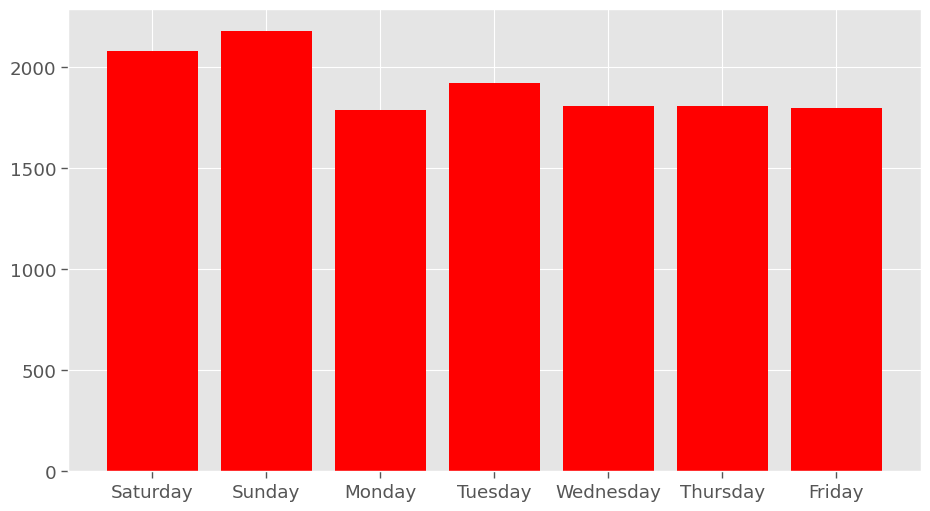

In [36]:
daily_data.set_index(daily_data.index.strftime("%A"),inplace=True)
D={}
for day in daily_data.index.unique():
    D[day] = daily_data.loc[day]["Energy_Consumption"].sum()
print(D) 
plt.figure(figsize=(11,6))
sns.set_context('paper', font_scale=1.5)
plt.bar(range(len(D)), D.values(), align='center',color="red")
plt.xticks(range(len(D)), list(D.keys()))
plt.show()


<font color="purple">=>Samedi et dimanche sont les jours de grande consommation.</font>

{'December': 60.392853, 'January': 54.34555, 'February': 46.281975, 'March': 42.58495, 'April': 34.057327, 'May': 31.67977, 'June': 25.58665, 'July': 22.787203, 'August': 17.540123, 'September': 30.225674, 'October': 39.27544, 'November': 47.521545}


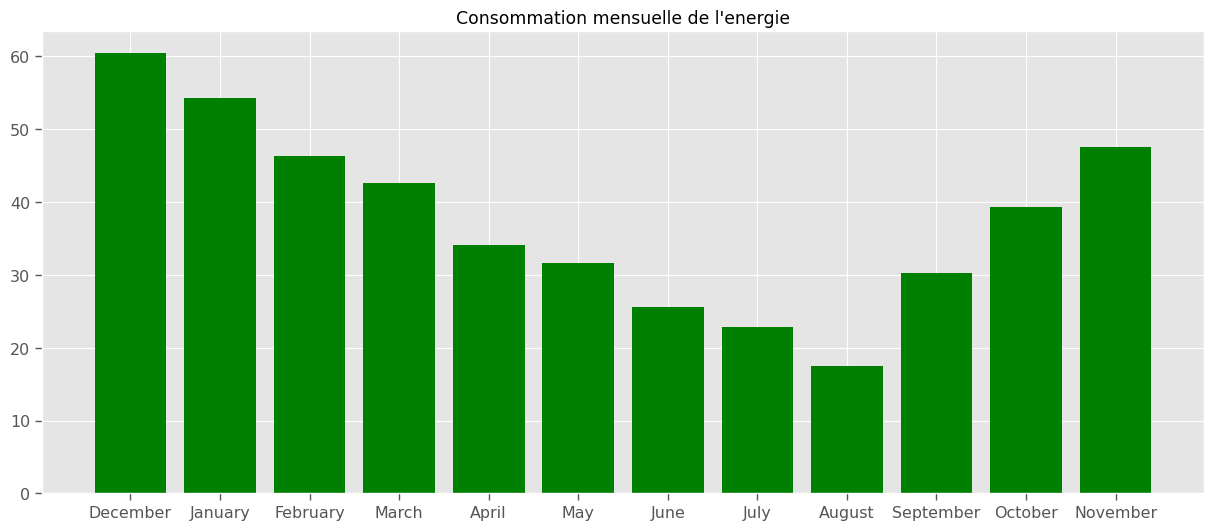

In [37]:
monthly_data.set_index(monthly_data.index.strftime("%B"),inplace=True)
M={}
S1={}
S2={}
S3={}
for month in monthly_data.index.unique():
    M[month] = monthly_data.loc[month]["Energy_Consumption"].sum()
    S1[month] = monthly_data.loc[month]["Sub_metering_1"].sum()
    S2[month] = monthly_data.loc[month]["Sub_metering_2"].sum()
    S3[month] = monthly_data.loc[month]["Sub_metering_3"].sum()
     
print(M) 
plt.figure(figsize=(15,6))
sns.set_context('paper', font_scale=1.3)
plt.bar(range(len(M)), M.values(), align='center',color="green")
plt.xticks(range(len(M)), list(M.keys()))
plt.title("Consommation mensuelle de l'energie")
plt.show()


<font color="purple">=>Novembre Decembre et Janvier sont les mois de grande consommation.</font>

<font color= #2e4053 ><b>D'aprés les graphes on peut classer les individus en 3 classes: classe de grande consommation (November,December,January,February,March), classe de consommation moyenne(April,May,September,October) et classe de faible consommation (June,July,August) .
    </b></font>

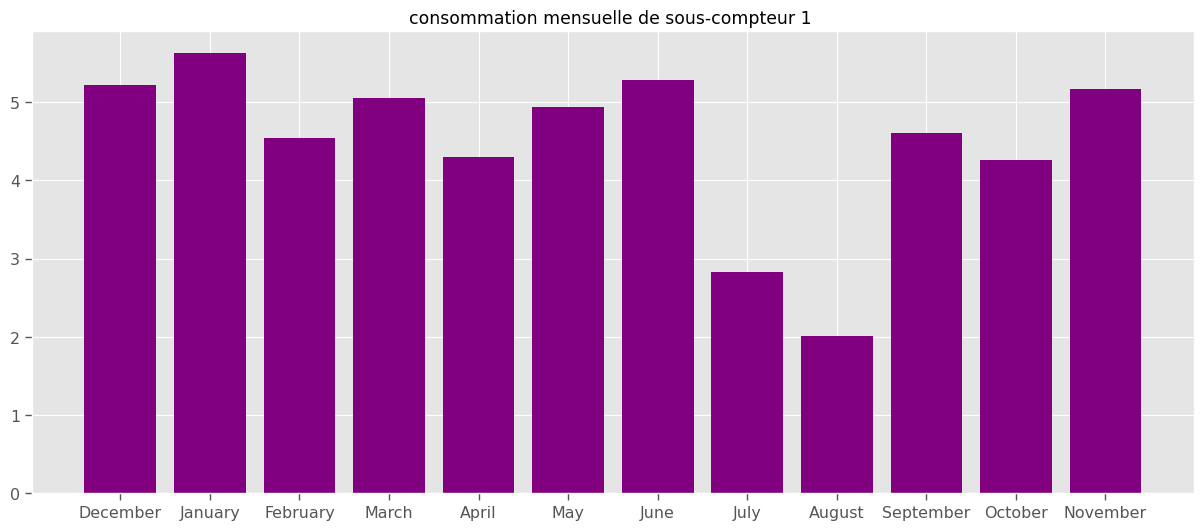

In [38]:
plt.figure(figsize=(15,6))
sns.set_context('paper', font_scale=1.3)
plt.bar(range(len(S1)), S1.values(), align='center',color="PURPLE")
plt.xticks(range(len(S1)), list(S1.keys()))
plt.title("consommation mensuelle de sous-compteur 1 ")
plt.show()


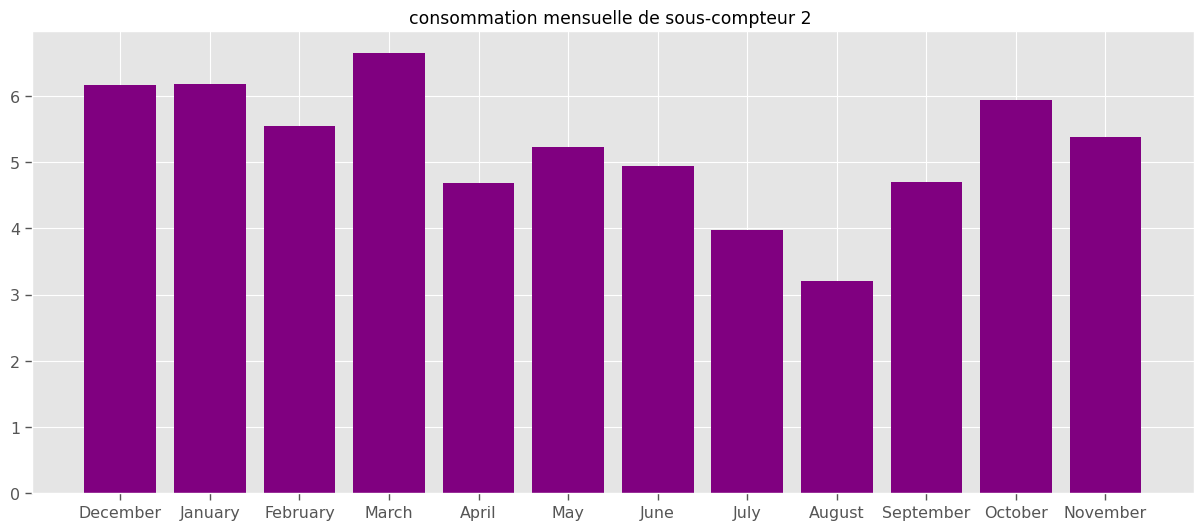

In [39]:
plt.figure(figsize=(15,6))
sns.set_context('paper', font_scale=1.3)
plt.bar(range(len(S2)), S2.values(), align='center',color="PURPLE")
plt.xticks(range(len(S2)), list(S2.keys()))
plt.title("consommation mensuelle de sous-compteur 2 ")
plt.show()

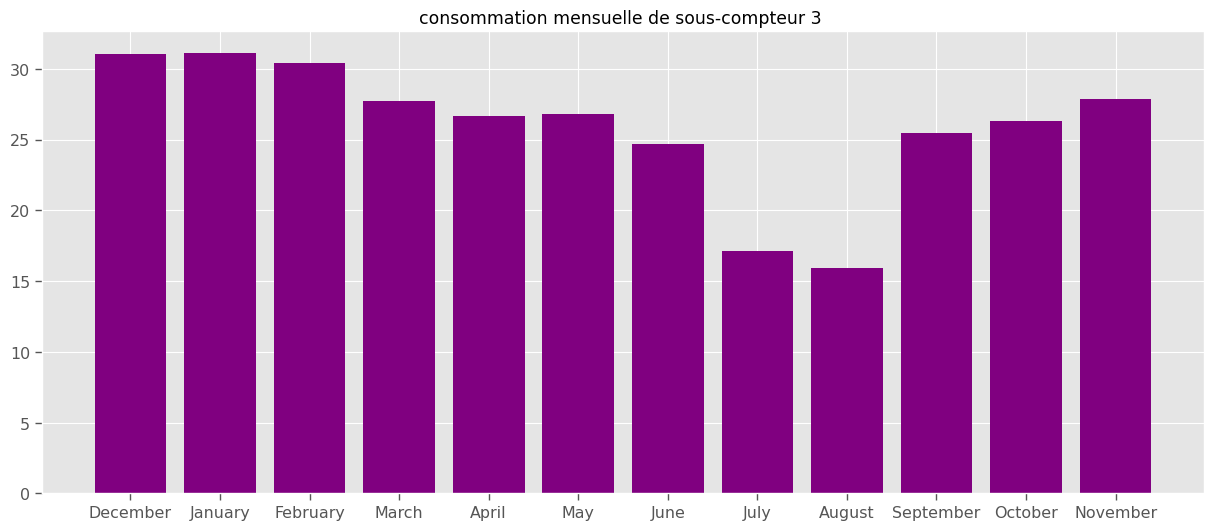

In [40]:
plt.figure(figsize=(15,6))
sns.set_context('paper', font_scale=1.3)
plt.bar(range(len(S3)), S3.values(), align='center',color="PURPLE")
plt.xticks(range(len(S3)), list(S3.keys()))
plt.title("consommation mensuelle de sous-compteur 3 ")
plt.show()

<font color= #2e4053 ><b>D'aprés les 3 derniers graphes , la consommation mensuelle de sous-compteur 1 et sous-compteur 2 est négligeable elle est de l'ordre de 5 et 6 watt par heure maximum  par contre la consommation de sous-compteur 3 arrive au 30 watt par heure pendant les mois d'hiver Decembre et Janvier .</b> </font>

<b><h4>Classification des individus en 3 classes :</h4></b>

In [41]:
from sklearn.cluster import KMeans

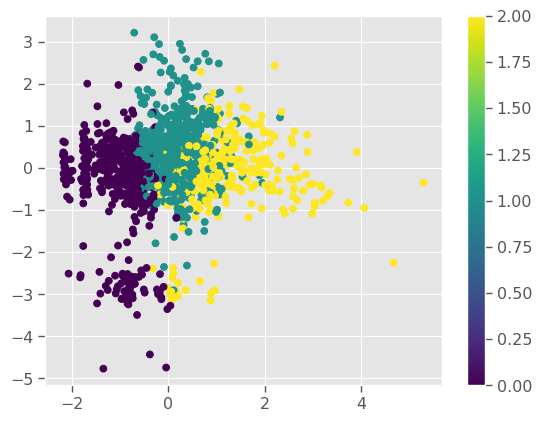

In [42]:
daily_data_scaled=np.nan_to_num(daily_data_scaled)
kmeans = KMeans(n_clusters=3,random_state=0)
y_pred = kmeans.fit_predict(daily_data_scaled)
plt.scatter(daily_data_scaled[:,0],daily_data_scaled[:,2],c=y_pred)
plt.colorbar()

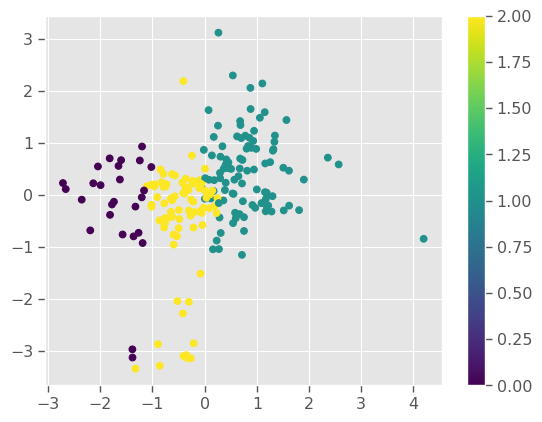

In [43]:
kmeans = KMeans(n_clusters=3,random_state=0)
y_pred1 = kmeans.fit_predict(weekly_data_scaled)
plt.scatter(weekly_data_scaled[:,0],weekly_data_scaled[:,2],c=y_pred1)
plt.colorbar()

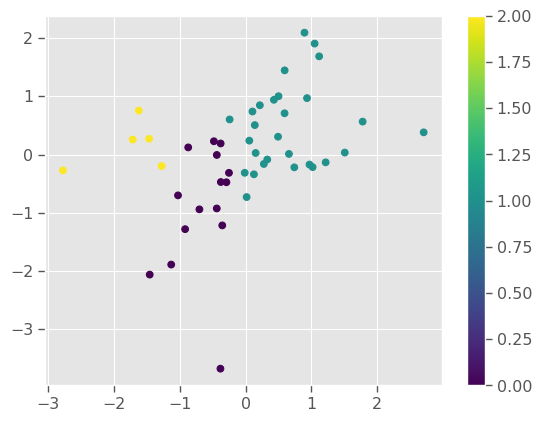

In [44]:
kmeans = KMeans(n_clusters=3,random_state=0)
y_pred2 = kmeans.fit_predict(monthly_data_scaled)
plt.scatter(monthly_data_scaled[:,0],monthly_data_scaled[:,2],c=y_pred2)
plt.colorbar()

In [45]:
daily_data["class"] = y_pred
weekly_data["class"] = y_pred1
monthly_data["class"] = y_pred2

In [46]:
print(daily_data.head(2))
print(weekly_data.head(2))
print(monthly_data.head(2))

          Global_active_power  Global_reactive_power     Voltage  \
datetime                                                           
Saturday             3.053475               0.088187  236.243759   
Sunday               2.354486               0.156949  240.087021   

          Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
datetime                                                                     
Saturday         13.082829        0.000000        1.378788       12.439394   
Sunday            9.999028        1.411806        2.907639        9.264584   

          Energy_Consumption  class  
datetime                             
Saturday           37.073063      2  
Sunday             25.657408      2  
            Global_active_power  Global_reactive_power     Voltage  \
datetime                                                             
2006-12-17             2.505248               0.142118  239.258087   
2006-12-24             1.734186               0.1167

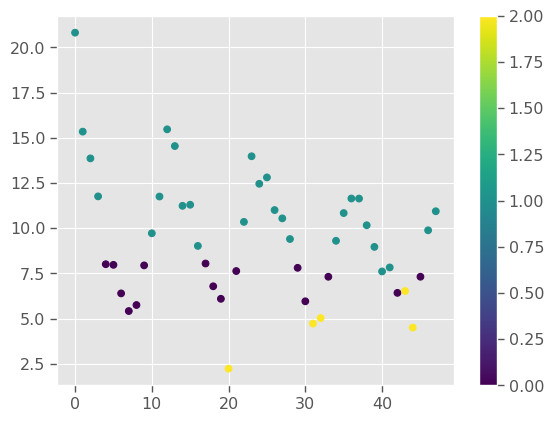

In [47]:
plt.scatter(range(len(monthly_data)),monthly_data.Energy_Consumption[:], c=y_pred2)
plt.colorbar()

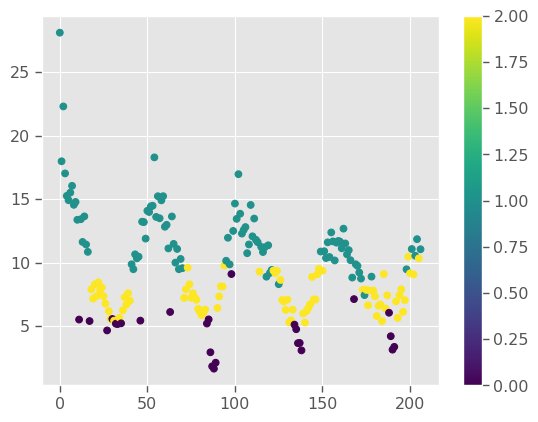

In [48]:
plt.scatter(range(len(weekly_data)),weekly_data.Energy_Consumption[:], c=y_pred1)
plt.colorbar()

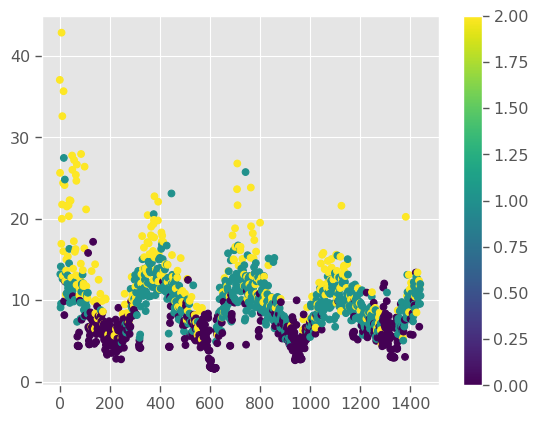

In [49]:
plt.scatter(range(len(daily_data)),daily_data.Energy_Consumption[:], c=y_pred)
plt.colorbar()

<font color= #2e4053 ><b>On voit une grande consommation dans les mois froids d'hiver car il y'a une utilisation fréquente de chauffage électrique et aussi de chauffe bain , la différence entre la classe des mois froids et la saison de printemps est la faible diminution de consommation de chauffage et concernant la saison d'été l'utilisisation de ce dernier est négligeable mais il y'a une légère consommation de climatiseur d'ou la faible consommation d'energie électrique pendant ces mois chaudes.
La nouvelle variable "Energy_Consumption" est la combinaison de la consommation d'énergie globale active est la consommation des machines éléctriques situés dans la dataset  donc c'est une consommation d'autres machines électriques dans la maison citons :la télévision , le séchoir et machine a laver , d'ou les memes allures et les memes résultats.
Et on déduit que cette variable est trés importante par rapport au type de consammation de la dataset .</b></font>

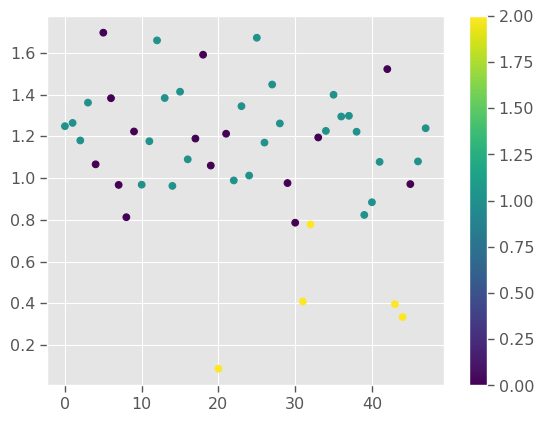

In [50]:
plt.scatter(range(len(monthly_data)),monthly_data.Sub_metering_1[:], c=y_pred2)
plt.colorbar()

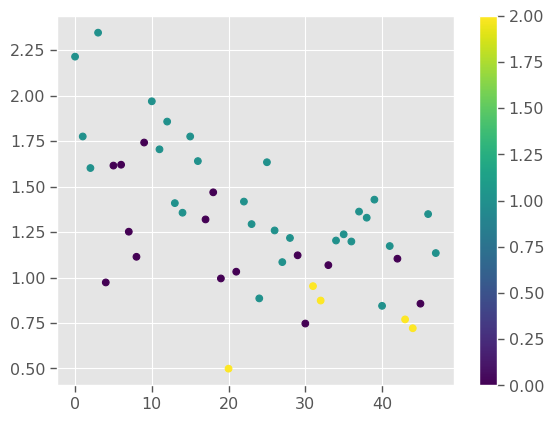

In [51]:
plt.scatter(range(len(monthly_data)),monthly_data.Sub_metering_2[:], c=y_pred2)
plt.colorbar()

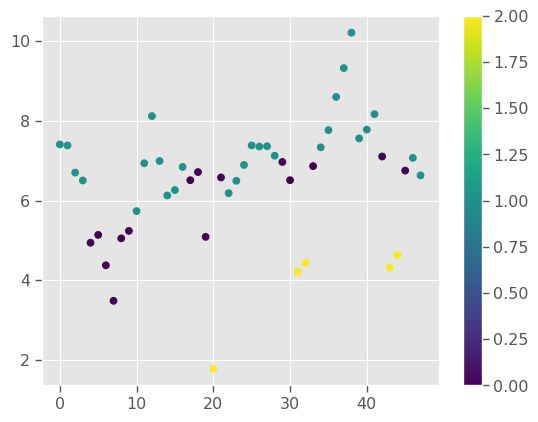

In [52]:
plt.scatter(range(len(monthly_data)),monthly_data.Sub_metering_3[:], c=y_pred2)
plt.colorbar()

<font color= #2e4053 ><b>D'aprés les 3 courbes de la consommation de chaque sub_metering on remarque l'absence de variation des sub_metering1 et sub_metering2 par rapport les saisons ,avec une consommation assez faible par rapport au sub_metering3, alors que la courbe du sub_metering3 on voit une augmentation de la variation par rapport au saison , elle augmente de l ete puis les mois de l'automne et le printemps jusqu'a la saison d'hiver , ou il ya la plus grande consommation .</b></font>

<font color="PaleVioletRed" ><b><h2>Tutorial Analyse Statistique: Consommation Electrique avec Pandas-partie 2</h2></b></font>

In [188]:
dataset = dataset[['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_2', 'Sub_metering_1','Sub_metering_3']]

<font color= #ba4a00 ><h4><b><i>Rééchantillonner les données par heure</i></b></h4></font>

In [189]:
hourly_data = dataset.resample('h').mean() 
hourly_data.shape

(34589, 7)

<font color= #ba4a00 ><h4><b><i>convertir des séries en apprentissage supervisé</i></b></h4></font>

In [190]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)] 
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))#dans ce cas 0 ce sont les colonnes du output
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)] 
        # put it all together
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        # drop rows with NaN values
        if dropnan:
            agg.dropna(inplace=True)
        return agg

<font color= #ba4a00 ><h4><b><i>Normaliser des données et les convertir en Dataframe</i></b></h4></font>

In [191]:
from sklearn.preprocessing import MinMaxScaler
values = hourly_data.values
#normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
r = list(range(hourly_data.shape[1]+1, 2*hourly_data.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.636816   0.295738   0.337945   0.631157   0.011366        0.0   
2   0.545045   0.103358   0.335501   0.541487   0.144652        0.0   
3   0.509006   0.110073   0.283801   0.502152   0.030869        0.0   
4   0.488550   0.096987   0.315988   0.481110   0.000000        0.0   
5   0.455597   0.099010   0.434417   0.449904   0.008973        0.0   

   var7(t-1)   var1(t)  
1   0.782418  0.545045  
2   0.782676  0.509006  
3   0.774169  0.488550  
4   0.778809  0.455597  
5   0.798917  0.322555  


<font color= #2e4053 ><b>Ainsi, nous aurons 7 variables de série d'entrée et 1 variable de sortie pour 'Global_active_power' au temps actuelle en heure.Nous divisons également les données en : trains et ensembles de validation. Je sélectionne
16000 données sur 34589 données pour m'entraîner et le reste sera utilisé pour tester le modèle.</b></font>

<font color= #ba4a00 ><h4><b><i>Fractionnement des données en séries de données de formation et de test</i></b></h4></font>

In [192]:
values = reframed.values
n_train_time = 30000
training_set = values[:n_train_time, :]
testing_set = values[n_train_time:, :]
X_train, y_train = training_set[:, :-1], training_set[:,-1]
X_test, y_test = testing_set [:, :-1], testing_set [:,-1]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print("X_train shape est ",X_train.shape)
print("y_train shape est",y_train.shape)
print("X_test shape est ",X_test.shape)
print("y_test shape est",y_test.shape)

X_train shape est  (30000, 1, 7)
y_train shape est (30000,)
X_test shape est  (4159, 1, 7)
y_test shape est (4159,)


<font color= #ba4a00 ><h4><b><i>Construction de notre model</i></b></h4></font>

In [59]:
dropout = [0.1,0.2,0.3,0.4]
nn = [32,64,70,100]
batch_size = [16,32,48,64]
epochs = [10,20,30,40,50,60,70]
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

def build_model(nn=1,dropout=0.1):
    model = Sequential()
    model.add(LSTM(nn, input_shape=(X_train.shape[1], X_train.shape[2])))#[n_steps,features]
    model.add(Dropout(dropout))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])
    return model
model = KerasClassifier(build_fn=build_model, epochs=100, batch_size=10, verbose=0)
param_grid = dict(nn=nn,batch_size=batch_size, epochs=epochs ,dropout=dropout)
grid = GridSearchCV(estimator=model, param_grid=param_grid , n_jobs=-1 , cv=3)
grid_result = grid.fit(X_train,y_train, validation_data=(X_test, y_test))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.000233 using {'batch_size': 16, 'dropout': 0.1, 'epochs': 10, 'nn': 32}


<font color= #ba4a00 ><h4><b><i>Créer un modèle LSTM et le former selon les paramétres trouvés</i></b></h4></font>

Epoch 1/10
1875/1875 - 2s - loss: 0.0117 - accuracy: 3.3333e-05 - val_loss: 0.0067 - val_accuracy: 0.0000e+00
Epoch 2/10
1875/1875 - 1s - loss: 0.0093 - accuracy: 6.6667e-05 - val_loss: 0.0066 - val_accuracy: 0.0000e+00
Epoch 3/10
1875/1875 - 1s - loss: 0.0091 - accuracy: 6.6667e-05 - val_loss: 0.0066 - val_accuracy: 0.0000e+00
Epoch 4/10
1875/1875 - 1s - loss: 0.0091 - accuracy: 6.6667e-05 - val_loss: 0.0065 - val_accuracy: 0.0000e+00
Epoch 5/10
1875/1875 - 1s - loss: 0.0090 - accuracy: 6.6667e-05 - val_loss: 0.0065 - val_accuracy: 0.0000e+00
Epoch 6/10
1875/1875 - 1s - loss: 0.0090 - accuracy: 6.6667e-05 - val_loss: 0.0065 - val_accuracy: 0.0000e+00
Epoch 7/10
1875/1875 - 1s - loss: 0.0090 - accuracy: 6.6667e-05 - val_loss: 0.0065 - val_accuracy: 0.0000e+00
Epoch 8/10
1875/1875 - 1s - loss: 0.0090 - accuracy: 6.6667e-05 - val_loss: 0.0065 - val_accuracy: 0.0000e+00
Epoch 9/10
1875/1875 - 1s - loss: 0.0090 - accuracy: 6.6667e-05 - val_loss: 0.0065 - val_accuracy: 0.0000e+00
Epoch 10/1

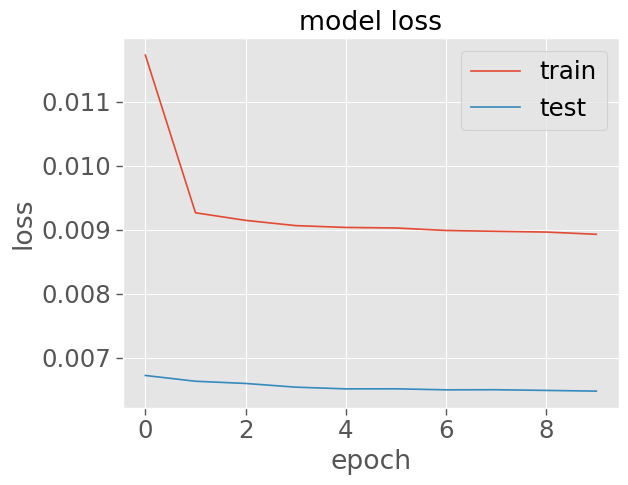

In [193]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
model = Sequential()
model.add(LSTM(32,activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])

# Network fitting
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=2 ,shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

<font color= #ba4a00 ><h4><b><i>Faire de futures prédictions</i></b></h4></font>

In [194]:
from sklearn.metrics import mean_squared_error,r2_score
size = hourly_data.shape[1]
# Prediction test
predicted_value_scaled = model.predict(X_test)
print(predicted_value_scaled.shape)
X_test = X_test.reshape((X_test.shape[0], size))
print(X_test.shape)

# invert scaling for prediction
all_values_scaled = np.concatenate((predicted_value_scaled, X_test[:, 1-size:]), axis=1)
all_values = scaler.inverse_transform(all_values_scaled)
predicted_value = all_values[:,0]

# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
dataset_scaled = np.concatenate((y_test, X_test[:, 1-size:]), axis=1)
all_dataset = scaler.inverse_transform(dataset_scaled)
actual_value = all_dataset[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_value, predicted_value))
print('Test RMSE: %.3f' % rmse)
r2_score(actual_value,predicted_value)

(4159, 1)
(4159, 7)
Test RMSE: 0.518


0.46690272528683874

<font color= #ba4a00 ><h4><b><i>Visualisation graphique de notre prediction dans 500 heures</i></b></h4></font>

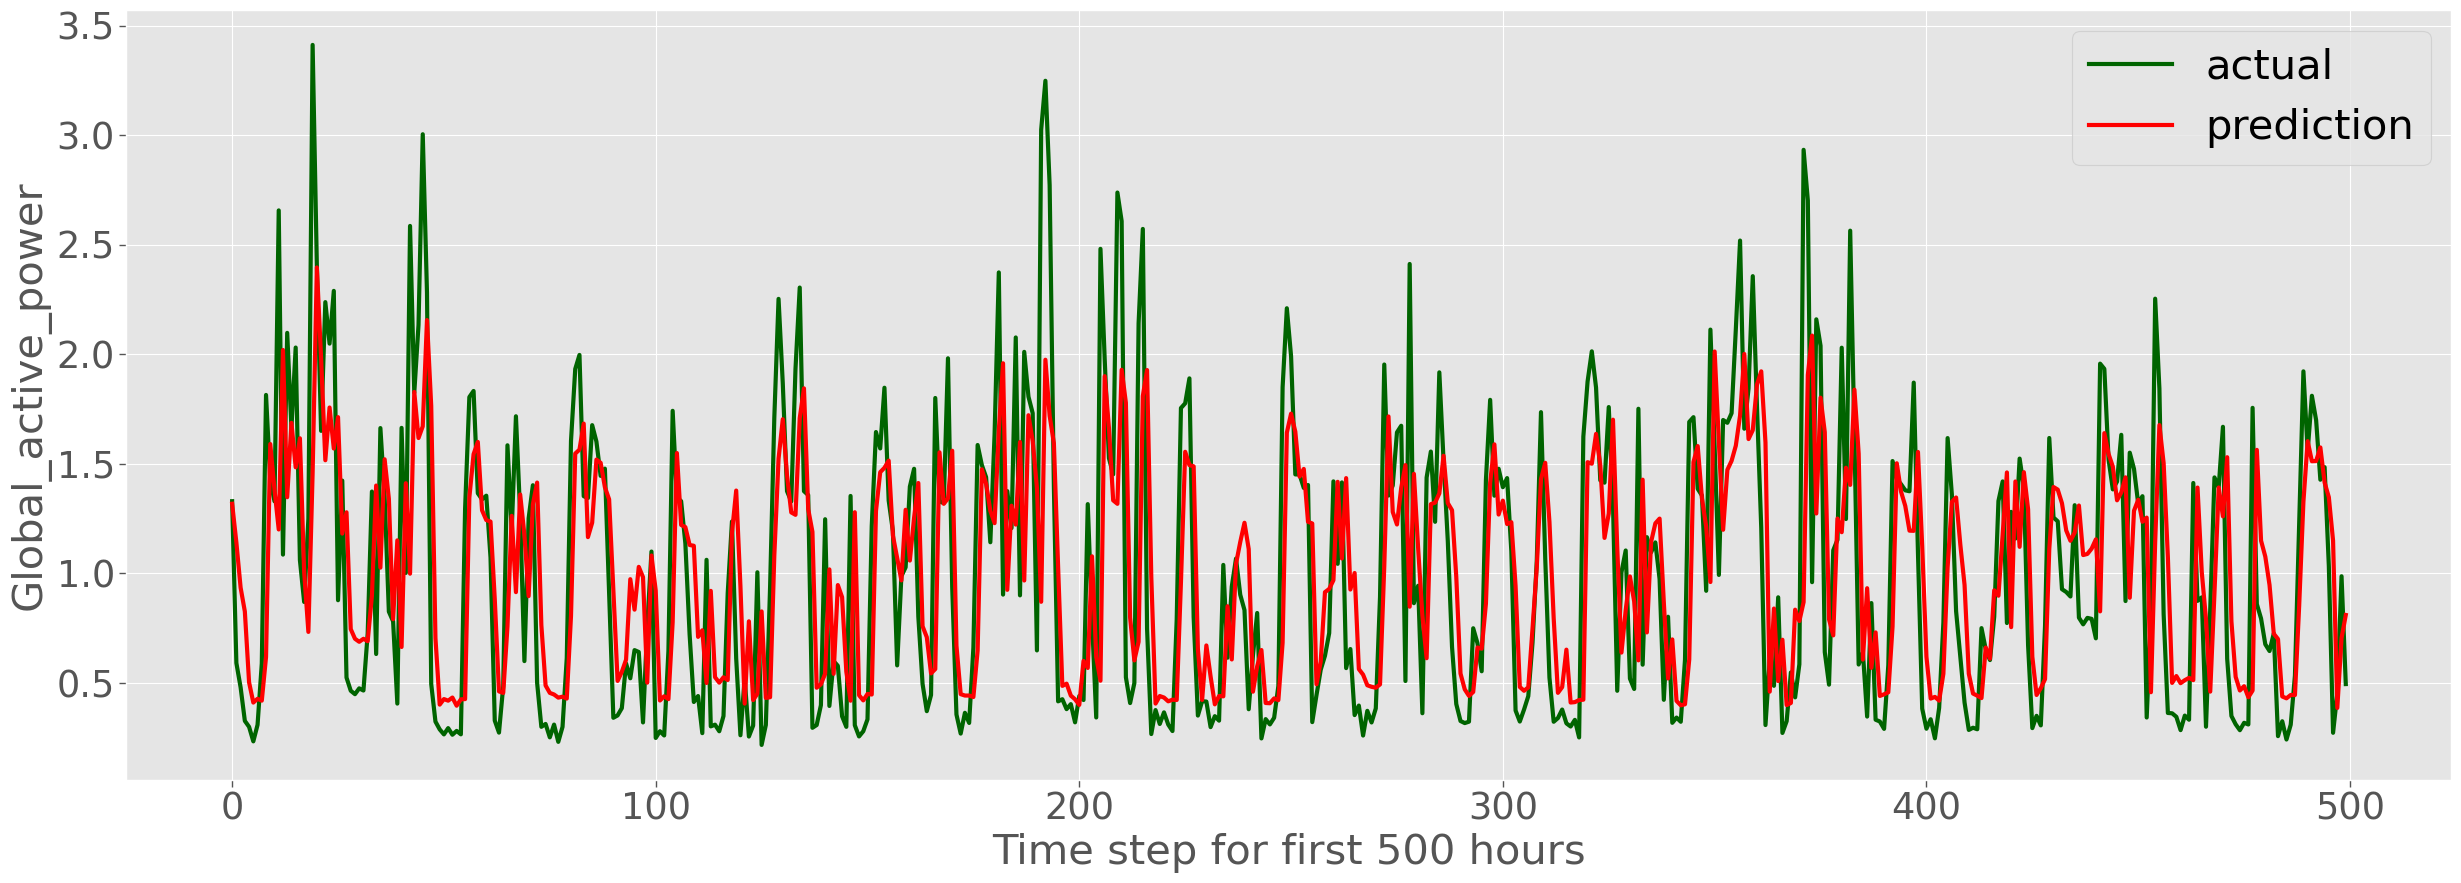

In [173]:

aa=[x for x in range(500)]
plt.figure(figsize=(30,10)) 
plt.plot(aa, actual_value[:500],  label="actual",color="darkgreen",lw=3)
plt.plot(aa, predicted_value[:500],  label="prediction",color="red",lw=3)
plt.ylabel(dataset.columns[0], size=30)
plt.xlabel('Time step for first 500 hours', size=30 )
plt.legend(fontsize=30)
sns.set_context('paper', font_scale=2)
plt.show()